<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/Homework/MLZoomcampWeek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

Note: sometimes your answer might not match one of the options exactly. That's fine. Select the option that's closest to your solution.

The goal of this homework is to familiarize you with BentoML and how to build and test an ML production service.

## Background
You are a new recruit at ACME corp. Your manager is emailing you about your first assignment.

## Email from your manager
Good morning recruit! It's good to have you here! I have an assignment for you. I have a data scientist that's built a credit risk model in a jupyter notebook. I need you to run the notebook and save the model with BentoML and see how big the model is. If it's greater than a certain size, I'm going to have to request additional resources from our infra team. Please let me know how big it is.

Thanks,

Mr McManager

# Q1
**Answer:** bentoml, version 1.0.7

Install BentoML
What's the version of BentoML you installed?
Use --version to find out

In [1]:
!pip install bentoml

In [2]:
!bentoml --version

bentoml, version 1.0.7


# Q2
**Answer:** 114kb

Run the notebook which contains the xgboost model from module 6 i.e previous module and save the xgboost model with BentoML. To make it easier for you we have prepared this [notebook](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/07-bentoml-production/code/train.ipynb).

How big approximately is the saved BentoML model? Size can slightly vary depending on your local development environment. Choose the size closest to your model.

* 924kb
* 724kb
* 114kb
* 8kb

# Another email from your manager

Great job recruit! Looks like I won't be having to go back to the procurement team. Thanks for the information.

However, I just got word from one of the teams that's using one of our ML services and they're saying our service is "broken" and their trying to blame our model. I looked at the data their sending and it's completely bogus. I don't want them to send bad data to us and blame us for our models. Could you write a pydantic schema for the data that they should be sending? That way next time it will tell them it's their data that's bad and not our model.

Thanks,

Mr McManager

# Q3
**Answer:**
class CreditApplication(BaseModel):
    name : string
    age : integer
    country : string
    rating : float32

Say you have the following data that you're sending to your service:

```
{
  "name": "Tim",
  "age": 37,
  "country": "US",
  "rating": 3.14
}
```

What would the pydantic class look like? You can name the class `UserProfile`

In [ ]:
from pydantic import BaseModel

class CreditApplication(BaseModel):
    name : string
    age : integer
    country : string
    rating : float32

# Email from your CEO

Good morning! I hear you're the one to go to if I need something done well! We've got a new model that a big client needs deployed ASAP. I need you to build a service with it and test it against the old model and make sure that it performs better, otherwise we're going to lose this client. All our hopes are with you!

Thanks,

CEO of Acme Corp

# Q4
**Answer:** 1.1.1

We've prepared a model for you that you can import using:

```
curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel
bentoml models import coolmodel.bentomodel
```

What version of scikit-learn was this model trained with?

* 1.1.1
* 1.1.2
* 1.1.3
* 1.1.4
* 1.1.5

# Q5
**Answer:** 1

Create a bento out of this scikit-learn model. The output type for this endpoint should be `NumpyNdarray()`

Send this array to the Bento:

`[[6.4,3.5,4.5,1.2]]`

You can use curl or the Swagger UI. What value does it return?

* 0
* 1
* 2
* 3

(Make sure your environment has Scikit-Learn installed)

My file directory: C:\Users\gwm19\bentoml\models\mlzoomcamp_homework\qtzdz3slg6mwwdu5

In [11]:
%%writefile service.py

import numpy as np
import bentoml
from bentoml.io import NumpyNdarray

model_ref = bentoml.sklearn.get("mlzoomcamp_homework:latest")

# notice the latest tag so you don't have to update after every change
model_runner = bentoml.sklearn.get("mlzoomcamp_homework:latest").to_runner()

svc = bentoml.Service("mlzoomcamp_homework", runners=[model_runner])

# input and/or output could also be JSON() or some other type
@svc.api(input=NumpyNdarray(), output=NumpyNdarray()) 
async def classify(vector):
    prediction= model_runner.predict.run(vector)
    return prediction

Overwriting service.py


# Q6

Ensure to serve your bento with --production for this question

Install locust using:

`pip install locust`

Use the following locust file: [locustfile.py](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/locustfile.py)

Ensure that it is pointed at your bento's endpoint (In case you didn't name your endpoint "classify")

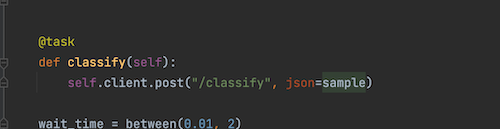

Configure 100 users with ramp time of 10 users per second. Click "Start Swarming" and ensure that it is working.

Now download a second model with this command:

`curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel`
Or you can download with this link as well: https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

Now import the model:

`bentoml models import coolmodel2.bentomodel`

Update your bento's runner tag and test with both models. Which model allows more traffic (more throughput) as you ramp up the traffic?

Hint 1: Remember to turn off and turn on your bento service between changing the model tag. Use Ctl-C to close the service in between trials.

Hint 2: Increase the number of concurrent users to see which one has higher throughput

Which model has better performance at higher volumes?

* The first model
* The second model

In [ ]:
%%writefile service.py

import numpy as np
import bentoml
from bentoml.io import NumpyNdarray
bentoml models import coolmodel2.bentomodel

model_ref = bentoml.sklearn.get("mlzoomcamp_homework:latest")

# notice the latest tag so you don't have to update after every change
model_runner = bentoml.sklearn.get("mlzoomcamp_homework:latest").to_runner()

svc = bentoml.Service("mlzoomcamp_homework", runners=[model_runner])

# input and/or output could also be JSON() or some other type
@svc.api(input=NumpyNdarray(), output=NumpyNdarray()) 
async def classify(vector):
    prediction= model_runner.predict.run(vector)
    return prediction

First: 491.3 RPS
Second: 

# Q7 (Optional)

Go to this Bento deployment of Stable Diffusion: http://54.176.205.174/ (or deploy it yourself)

Use the txt2image endpoint and update the prompt to: "A cartoon dragon with sunglasses". Don't change the seed, it should be 0 by default

What is the resulting image?

#1
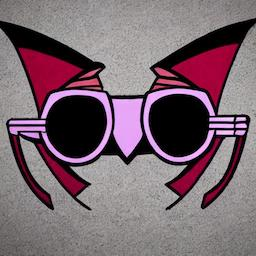

#2
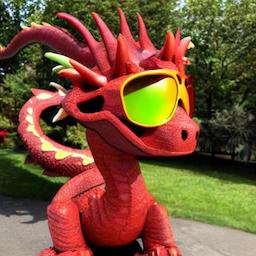

#3
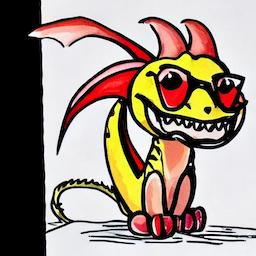

#4
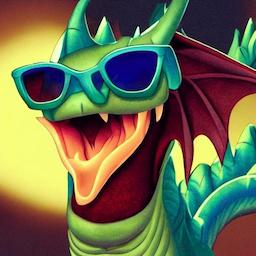

# Submit the results

Submit your results here: https://forms.gle/Hh9FWy6LGXk3wJYs8
You can submit your solution multiple times. In this case, only the last submission will be used
If your answer doesn't match options exactly, select the closest one
Deadline
The deadline for submitting is 24 October 2022 (Monday), 23:00 CEST (Berlin time).

After that, the form will be closed.